<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%201/05/assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applications of Logistic Regression and Tooling Up

## Expected Time
We will be spending at least 2 hours of class time on this.  Additionally, as a rough guide, we expect you to spend a minimum of another 2 hours on this out of class.  The assignment will be before Monday's class.

## Learning Objectives and Motivation

This course has three main strands.

1. Building mathematical and algorithmic foundation
2. Engineering processes for successful application of machine learning
3. Context and ethics of machine learning

Up until this point we've been doing a fair amount of (1) and (3), but we haven't had a chance to do much of (2).  At least, the things we've done in terms of machine learning applications have mostly been oriented towards demonstrating various properties of the algorithms we've been learning.

Today in class you'll have a chance to apply the algorithms that you are learning about to some real problems.  In this process you'll start to get a sense of some of the issues that are involved in solving a problem using a machine learning approach.

There will be two options for going through these exercises.

* *Option 1:* simply proceed, with your partner or tablemates, through the notebook.  In this path you'll have a lot of autonomy about how you decide to go through these exercises.  You can work together in-class, but we ask that you do some individual work on this outside of class and turn it in on Monday.

* *Option 2:* if you think you would benefit from a guided walk through of one of the datasets, we'll be holding the walkthrough in AC128 for the morning section and AC326 for the afternoon section.  We hope that this option will also be quite interactive and you'll have some ability to direct the experiments that we try.

## Outline of the Activity

Today's work in class will consist of the following activities.
* Choose a dataset for classification
* Explore the data
* Choose a feature representation
* Train a logistic regression model on the dataset
* Interpret weights learned by the model
* Evaluate the dataset performance
* Tweak the model in some way and evaluate the effect on performance
* Rinse and repeat

### Learning Goals
* Get a better handle on the machine learning train, interpret, validate, test cycle in machine learning
* Learn how to use tools like pandas and scikit learn for machine learning

### Deliverables

The deliverable for this assignment will be to writeup your main findings. This will be due on Monday.  Check the [assignment page](https://canvas.instructure.com/courses/1659968/assignments/12540481) on Canvas more information.

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Choose a Dataset

The focus of this activity will be on using logistic regression for classification.  Thus, you should choose a dataset that can naturally be approached as a ***classification problem***.  We are also going to be asking you to do a fair amount of interpretation of the fitted model, so you should try to choose a problem with ***a manageable number of independent variables*** (one exception would be computer vision tasks where if we use pixels as the input, we could visualize the weights as an image as we did in the in-clas notebook from last class).

Here are some suggestions for datasets to use.  We have prepared some of these datasets for you by extracting the data into a reasonable format for learning.  Since you have limited time, you might want to choose one of these.  If you want to practice data wrangling on your own, you can pick one of the other datasets (or a dataset of your own choosing).

### Smile Detection

This is one of our favorite datasets to work with.  If you've taken QEA, you may have already had a chance to play around with it, but there's definitely a lot to explore.

You can play around with choosing different sorts of features (e.g., filtering or normalizing the image in different ways) and run some rigorous experiments to establish expected peformance.

This dataset is called the [Genki dataset](https://inc.ucsd.edu/mplab/wordpress/index.html%3Fp=398.html) and it was collected at UC San Diego's Machine Perception Laboratory. The current links to the dataset appear to be defunct and unfortunately documentation is quite limited.  My (Paul's) memory is that these images were collected by scraping public social media profiles.

In [0]:
import gdown

gdown.download('https://drive.google.com/uc?authuser=0&id=0B0UHkPLHsgyoclIxTlhDd29tMjQ&export=download', 'train_human_genki.mat', False)

Downloading...
From: https://drive.google.com/uc?authuser=0&id=0B0UHkPLHsgyoclIxTlhDd29tMjQ&export=download
To: /content/train_human_genki.mat
64.1MB [00:00, 184MB/s] 


'train_human_genki.mat'

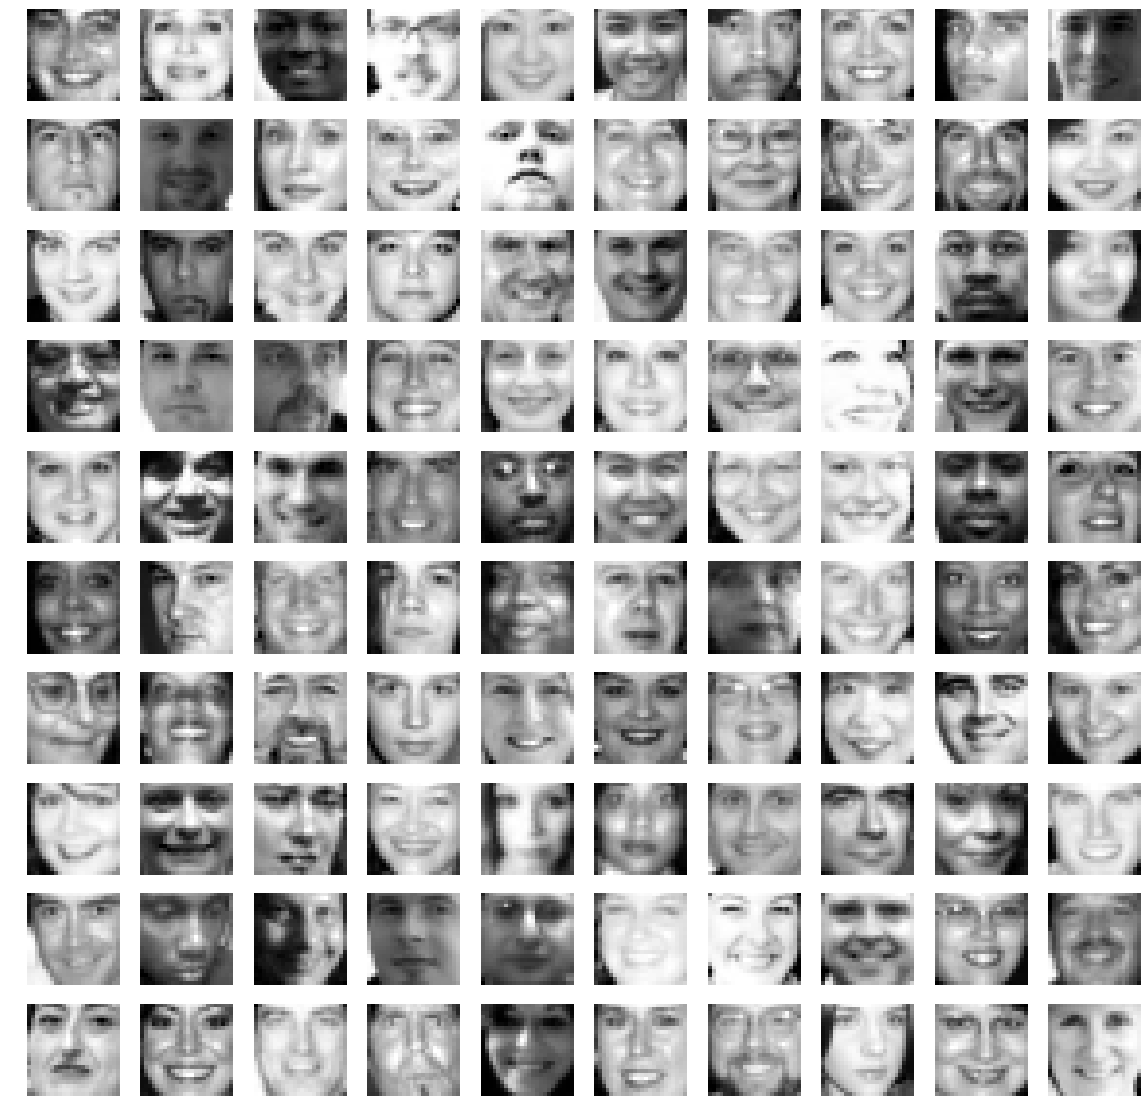

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('train_human_genki.mat')
images = data['images']
expression = data['expressions']

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.set_cmap('gray')
    ax.imshow(images[:, :, i].squeeze(), interpolation='none')
    ax.set_axis_off()
plt.show()

# expressions contains the expressions of each face (1 for smiling, 0 for not smiling)

### The Titanic Dataset

The [titanic dataset](https://www.kaggle.com/c/titanic) is the [Hello World](https://www.kaggle.com/c/titanic) of [Kaggle](https://www.kaggle.com/) competitions.  The task is very simple.  Given a description of a particular passenger on the titanic, predict whether the person survived the disaster.  The task is a little bit silly (we already know who survived afterall), but people tend to have a fairly good idea of what sensible model is ([gratuitous clip from the movie Titanic](https://www.youtube.com/watch?v=uAotd1YvRf8)).  In this way it is good for a starter problem.

If you'd like to use these for inspiration: [Sample Titanic Notebooks](https://www.kaggle.com/c/titanic/notebooks) from Kaggle

In [0]:
import gdown
import pandas as pd

gdown.download('https://drive.google.com/uc?authuser=0&id=1XIFiL3WxxR6M2nWgADi3xWvuRO6A-Ov8&export=download', 'titanic_train.csv', False)
df = pd.read_csv('titanic_train.csv')
df

Downloading...
From: https://drive.google.com/uc?authuser=0&id=1XIFiL3WxxR6M2nWgADi3xWvuRO6A-Ov8&export=download
To: /content/titanic_train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 10.3MB/s]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


You'll notice that we are reading in this data with Pandas.  Pandas is useful to know (and it will be even more useful next module).  Here we can work with a fairly minimal set of tools.  Consider reading [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min) for some of the basic operations.  If you don't want to deal with Pandas, we suggest extracting columns from the data frame using:

> `df['column_name']`

For example, in order to make a numpy array with sex and age you could use the following code (in order to encode the sex, we will use 1 to represent female and 0 to represent male).

In [0]:
import numpy as np

X = np.vstack((df['Age'], df['Sex'].map(lambda x: 1 if x == 'female'  else 0))).T
y = np.asarray(df['Survived'])
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (891, 2)
y.shape (891,)


When working with this dataset you'll want to visualize various aspects of it and think about various ways of recoding the data so that you can learn something with logistic regression.  The Kaggle [notebooks page for the Titanic dataset](https://www.kaggle.com/c/titanic/notebooks?sortBy=voteCount&group=everyone&pageSize=20&language=Python&competitionId=3136&turbolinks%5BrestorationIdentifier%5D=64eb0a07-314c-4872-9101-4185d73a8c74) has some great examples of how you might do this ([A Journey Through Titanic](https://www.kaggle.com/omarelgabry/a-journey-through-titanic) would be a good choice to read for ideas when you engage with some of the exercises to come later.)

### Aerial Cactus Identification

https://www.kaggle.com/c/aerial-cactus-identification/data
>
> To assess the impact of climate change on Earth's flora and fauna, it is vital to quantify how human activities such as logging, mining, and agriculture are impacting our protected natural areas. Researchers in Mexico have created the VIGIA project, which aims to build a system for autonomous surveillance of protected areas. A first step in such an effort is the ability to recognize the vegetation inside the protected areas. In this competition, you are tasked with creation of an algorithm that can identify a specific type of cactus in aerial imagery.



If you'd like to use these for inspiration: [Sample Aerial Cactus Identification Notebooks](https://www.kaggle.com/c/aerial-cactus-identification/notebooks) (these all seemed to use neural networks, but maybe you can find some that explore the data or use other techniques)

In [0]:
import gdown

gdown.download('https://drive.google.com/uc?authuser=0&id=10fBywwtsu5aTIlCSPuqzuXH7ICmJJ1RT&export=download', 'cactus_train_images.zip', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=16IP3tlP7z30zYo6Lfn2dgEGVHRLjWxrW&export=download', 'cactus_train.csv', False)
!unzip -o cactus_train_images.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?authuser=0&id=10fBywwtsu5aTIlCSPuqzuXH7ICmJJ1RT&export=download
To: /content/cactus_train_images.zip
20.1MB [00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?authuser=0&id=16IP3tlP7z30zYo6Lfn2dgEGVHRLjWxrW&export=download
To: /content/cactus_train.csv
100%|██████████| 683k/683k [00:00<00:00, 90.3MB/s]


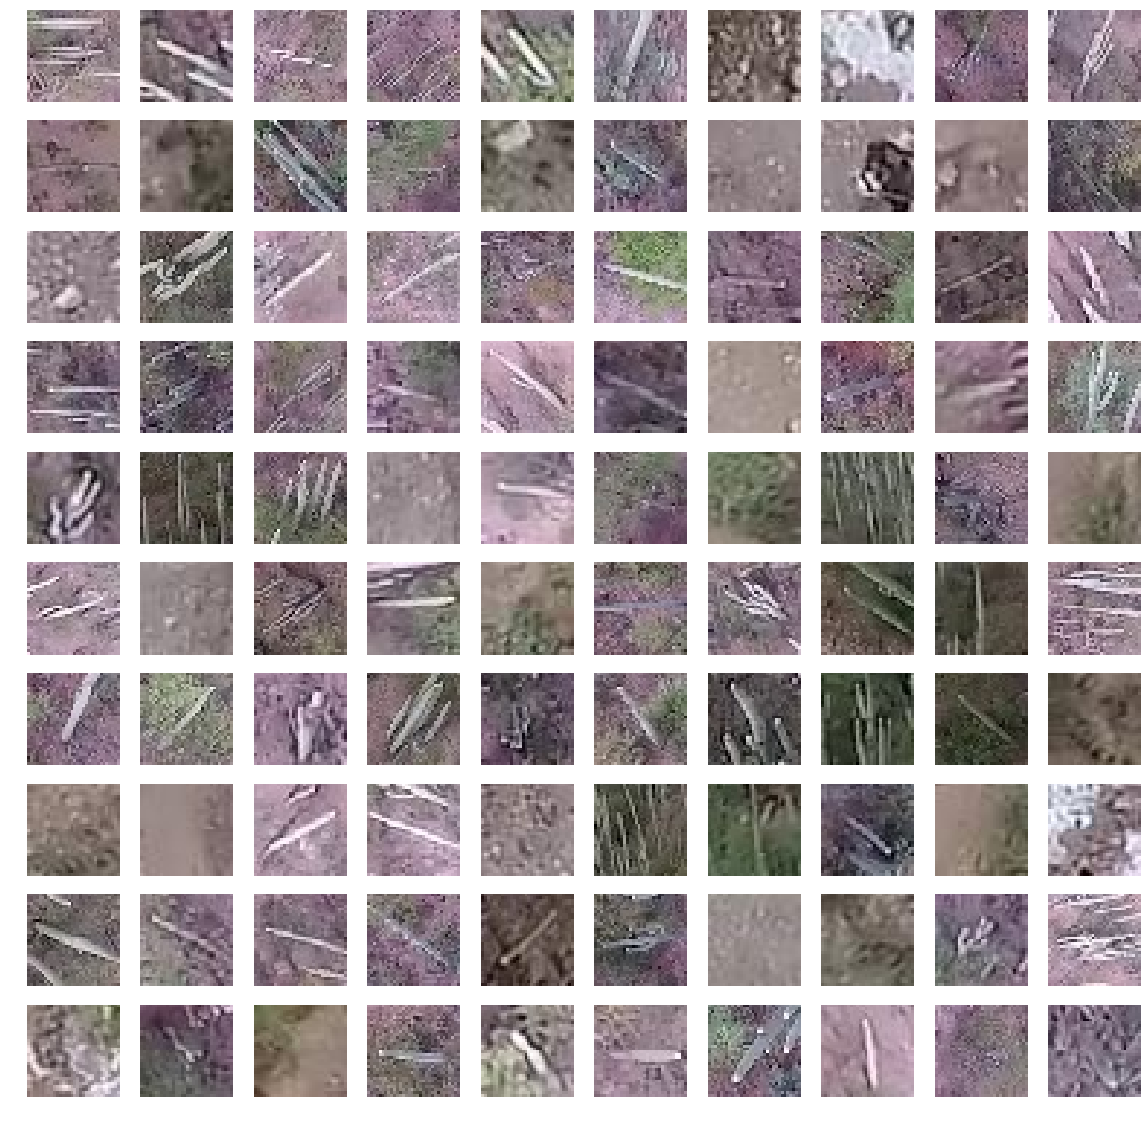

In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('cactus_train.csv')
df.index = df['id']
images = []
has_cactus = []
for file in sorted(glob('train/*.jpg')):
    im = cv2.imread(file)
    # opencv reads in the image in BGR color channel order.  Switch to RGB
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    d, filename = path.split(file)
    has_cactus.append(df.loc[filename, 'has_cactus'])
    images.append(im)

images = np.array(images)
y = np.array(has_cactus)

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.imshow(images[i, :, :, :].squeeze(), interpolation='none')
    ax.set_axis_off()
plt.show()

### Pet Adoption Speed Prediction

This dataset is taken from a Kaggle competition called [How Cute is that Doggy in the Shelter](https://www.kaggle.com/c/petfinder-adoption-prediction/overview).

The full competition uses images, text, and various attributes of the pet to predict adoption speed.  For our sample code, we'll just focus on the attributes (and leave the text and images alone).

If you'd like to use these for inspiration: [Sample Kaggle Notebooks from Petfinder competition](https://www.kaggle.com/c/petfinder-adoption-prediction/notebooks).

In [1]:
import gdown

gdown.download('https://drive.google.com/uc?authuser=0&id=1ckBa2ULUhF8qvlXwX3qWMs2TJNNdPHbq&export=download', 'pet_finder_train.csv', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1A_0y9OQhLB6GrI6FW3PXXtiyGdwtXF6z&export=download', 'breed_labels.csv', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1hRb7pOd86eYTYg1D_4WF7hSkHVPeFKfJ&export=download', 'color_labels.csv', False)

Downloading...
From: https://drive.google.com/uc?authuser=0&id=1ckBa2ULUhF8qvlXwX3qWMs2TJNNdPHbq&export=download
To: /content/pet_finder_train.csv
6.69MB [00:00, 95.4MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1A_0y9OQhLB6GrI6FW3PXXtiyGdwtXF6z&export=download
To: /content/breed_labels.csv
100%|██████████| 6.98k/6.98k [00:00<00:00, 6.55MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1hRb7pOd86eYTYg1D_4WF7hSkHVPeFKfJ&export=download
To: /content/color_labels.csv
100%|██████████| 88.0/88.0 [00:00<00:00, 28.2kB/s]


'color_labels.csv'

In [2]:
import pandas as pd

df = pd.read_csv('pet_finder_train.csv')
df_breeds = pd.read_csv('breed_labels.csv')
df_colors = pd.read_csv('color_labels.csv')
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


We didn't give very good scaffolding for how to interpret the weights of a logistic regression model when there is more than one class.  When there are $c$ different classes, the logistic regression model will have a different weight vector for each class.  Let's call the weight vector for the $j$th class $\mathbf{w_j}$.  The probability that some input $\mathbf{x_i}$ has output class $j$ is given by the following equation.

$$\mbox{probability of $x_i$ is of class $j$} =  \frac{e^{\mathbf{w_j}^\top \mathbf{x_i}}}{\sum_{k=1}^c e^{\mathbf{w_k}^\top \mathbf{x_i}}}$$

You can think of the dot product of $\mathbf{x_i}$ and $\mathbf{w_j}$ as basically giving a score of how likely $\mathbf{x_i}$ is to be of class $j$.  These scores are turned into probabilities by exponentiating them and dividing by the sum over all of the classes (to ensure that the probability of $\mathbf{x_i}$ belonging to each of the classes sums to 1).

Below, we demonstrate the basic idea with some code.

In [47]:
X = df[['Age', 'Quantity']]
y = df['AdoptionSpeed']

from sklearn.linear_model import LogisticRegression

# note: if you don't set this, then the probabilities won't match exactly!
# this is not too big of an issue, but we wanted to show you an exact match.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

x_1 = np.array(X.iloc[0])

print("model coefficients", model.coef_)
print("model intercepts", model.intercept_)
print("features for datapoint 1", x_1)
print("probabilities for datapoint 1", model.predict_proba([x_1]))

# to help solidify understanding we'll manually compute the probability of two
# different values for adoption speed
import numpy as np

print("manually calculated probability of class 1",\
      np.exp(np.matmul(model.coef_[0,:], x_1)+model.intercept_[0]) \
       / np.sum(np.exp(np.matmul(model.coef_, x_1)+model.intercept_)))

print("manually calculated probability of class 2",\
      np.exp(np.matmul(model.coef_[1,:], x_1)+model.intercept_[1]) \
       / np.sum(np.exp(np.matmul(model.coef_, x_1)+model.intercept_)))

model coefficients [[ 0.0004787  -0.06527242]
 [-0.00683755 -0.05379551]
 [-0.00476998  0.00426774]
 [ 0.00087802  0.01327224]
 [ 0.0102508   0.10152796]]
model intercepts [-1.63178375  0.42623225  0.5926312   0.30478843  0.30813187]
features for datapoint 1 [3 1]
probabilities for datapoint 1 [[0.02899861 0.22470582 0.28300285 0.21779684 0.24549589]]
manually calculated probability of class 1 0.0289986096970382
manually calculated probability of class 2 0.2247058154076948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### MNIST

This is probably the most famous dataset in all of machine learning.  The task is to classify handwritten digits.  Read all about [MNIST on Wikipedia](https://en.wikipedia.org/wiki/MNIST_database).

If you'd like to use these for inspiration: [Sample MNIST Notebooks on Kaggle](https://www.kaggle.com/c/digit-recognizer/notebooks) (warning: a lot of these seem to use neural networks, which we will be learning soon)

In [0]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

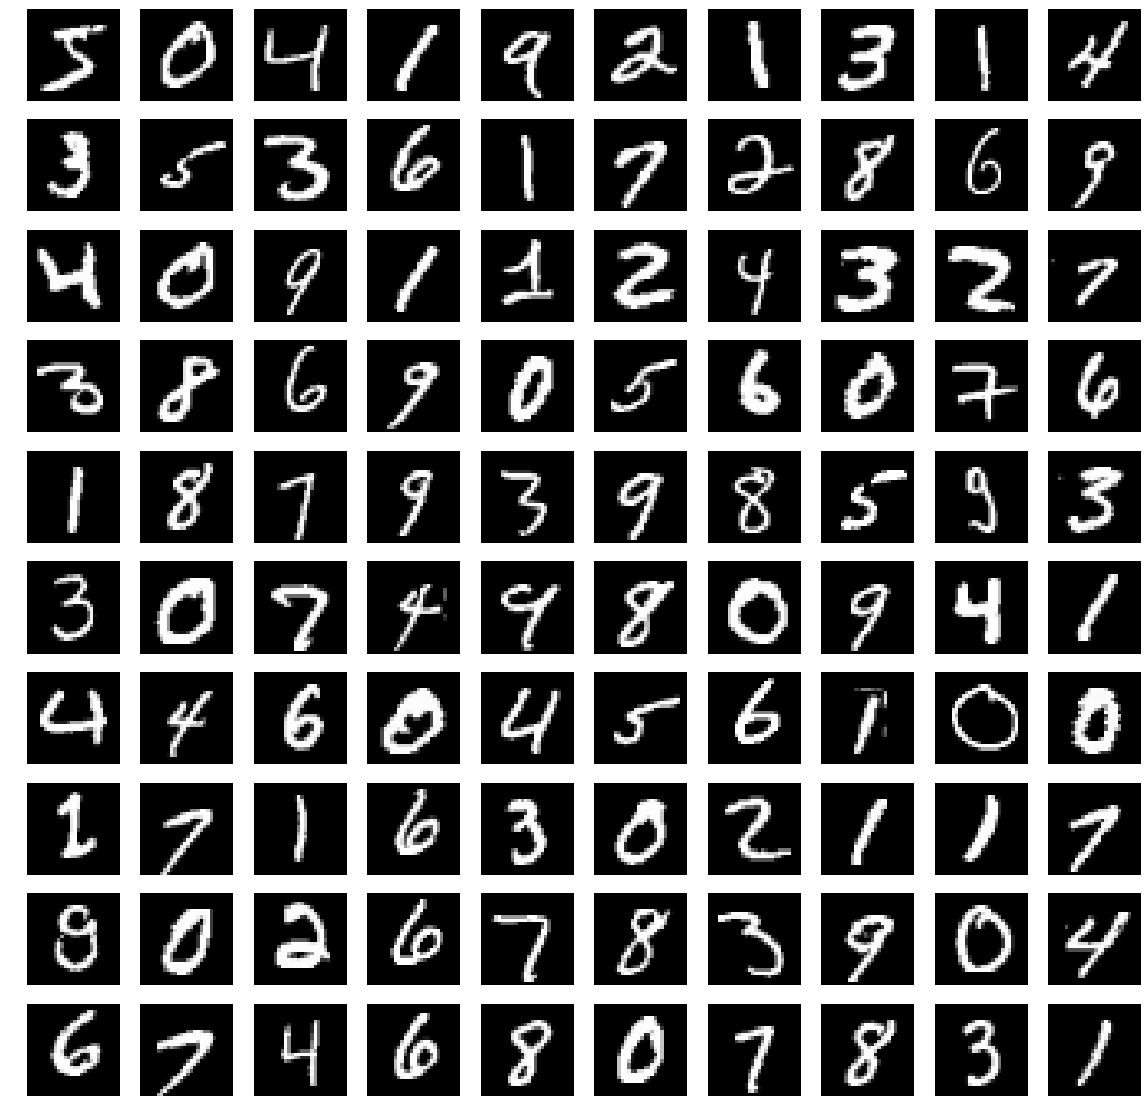

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.set_cmap('gray')
    ax.imshow(X[i,:].reshape((28, 28)), interpolation='none')
    ax.set_axis_off()
plt.show()

### Options that Require Some Data Wrangling (but we think are still doable)
* Find a classification [dataset on openml.org](https://www.openml.org/search?type=data).  You can parse the data using fuction `sklearn.datasets.fetch_openml` (documentation of [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html))
* Find a dataset on UCI Machine learning repository.  Here are some candidates based on some perusing the list.
    * [Absenteeism at Work](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)
    * [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29)

### Definitely too hard but really cool

* [iMet Collection 2019](https://www.kaggle.com/c/imet-2019-fgvc6/data)

* Choose a dataset for classification
* Explore the data
* Choose a feature representation
* Train a logistic regression model on the dataset
* Interpret weights learned by the model
* Evaluate the dataset performance
* Tweak the model in some way and evaluate the effect on performance
* Rinse and repeat

## Exploring the Data

One of the first things you should do when you apply a machine learning approach to a new dataset is to explore the dataset.  There are way too many folks that just take the data, train a model, and look at the percent accuracy.  This approach entirely misses the point.
* You cannot properly interpret your results unless you know what sort of data you are working with.
* You will not make good modeling decisions if you aren't familiar with the data.
* You will not be able to iterate your model effectively if you aren't familiar with the data.

### Suggested Steps to Perform
(we trust you to deviate from these steps if you have good reasons.)

For this part of the assignment, we suggest you perform some subset of the following things (note that for images a lot of these things can be naturally visualized as images, but for the tabular data you will probably wind up making plots, e.g., bar charts).
* For numerical data, look at the means and standard deviations of all of your features
* For numerical data, Look at the means and standard deviations of all of your features separated out according to the output value (e.g., look at the mean of each feature when the output is 1 and separately look at the mean of each feature when the output is 0).
* For numerical data, Look at pairwise correlations
* Make histograms or density plots for numerical data
* For non-numerical data (e.g., text), consider making bar charts to show frequency of occurrence of different values.

### Resources
* [Infographic Cheat Sheet Data Exploration-python](https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/)
* [A Guide to Pandas and Matplotlib for Data Exploration](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c)
* [A Journey Through Titanic](https://www.kaggle.com/omarelgabry/a-journey-through-titanic) (this one doesn't have a lot of explanations, but there are some nice recipes)
* [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Choosing Your Features

Once you've gotten a feel for the dataset, you will need to choose an initial set of features to use for training your model.  We suggest that for your first iteration you choose a pretty simple feature set that will be easy to interpret and iterate upon.

Here are some additional suggestions for creating features.
* If you have data that is categorical (that can take on a discrete set of values and those values are not naturally ordered in anyway), consider using the `pandas.get_dummies` function to encode.
* If you have images, consider using pixels as your feature set.  You may experiment with using [principal components analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) to reduce the dimensionality of your data before applying logistic regression.
* If you have images, consider filtering them in various ways.  You could then concatenate the pixels from the filtered image with the original pixels (or replace them).  [OpenCV has some good methods](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html) for doing this.

### Resources
* [pandas.get_dummmies documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.get_dummies.html)
* [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Guide to Encoding Categorical Variables in Python](https://pbpython.com/categorical-encoding.html) (really long, not suitable for skimming)
* [Principle Components Analysis with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [OpenCV Image Filtering](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)

## Training and Evaluating a Model

We recommend you use scikit learn for training your model.  You can use the built-in [Logistic Regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  If you want to play around with logistic regression with a ridge term (exactly the same ideas as we saw in linear regression), you can use [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html).

You've seen train / test splits, but now you might consider getting fancier by applying techniques such as [k-fold cross validation](https://machinelearningmastery.com/k-fold-cross-validation/).  Scikit has robust support for k-fold cross validation for estimating model performance and for tuning various model parameters (e.g., the ridge term, lambda, that we saw two assignments ago).

### Resources
* [An extended run through of logistic regression for MNIST using scikit](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
* [K-Fold Cross Validation on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
* [GridSearchCV on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (this is a technique for tuning parameters of a machine learning algorithm)

## Interpreting the Model Weights

When you train your model with sklearn, the model weights will be stored in the attribute `.coef_`.  The bias term will be stored in `.intercept_`.

If you are working with images, consider visualizing the weights as images (like we did with the head pose dataset).

## Tweaking the Model

Based on your results, come up with a tweak to your model.  You should have some intention behind the tweak.  The most natural one might be to improve your score on some metric (probably accuracy).  Alternatively, you might want to remove some undesireable property of your previous model (e.g., it might be exploiting a dubious strategy to solve the problem based on a spurious correlation in the data).

## Iterate

Based on your tweaked model, rerun your experiment.  Discuss how the results changed and what you learned from it.

## Deliverable

Based on your explorations, address the following prompts.  We don't expect you to write a 10-page research paper on what you did for this assignment, but do try to be clear in your explanations of what you did.

* What dataset did you investigate?
* Based on exploring the data, what were the most striking features
* What features did you use to train your model?
* How well did your initial model work?
* Based on looking at the weights, how was the model arriving at its predictions?
* What tweak did you try and what were the results of trying it?

## Guided Walkthrough

We'll be going through the analysis in [this notebook](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python#0.-Belfast,-an-earlier-incubator).

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

In [0]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

### Examining the Data

A good precursor to exploring the data is to find some way to display the data (e.g., as text, pictures, graphs).  In addition to just looking at the data frame, Pandas has a nice function called [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) that does a reasonable job of this for dataframes.  Notice though that it only displays numerical data.

In [0]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
print(df.columns)
df.describe()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Make sure you understand what each of these rows mean (the column names are specific to the Titanic dataset).  One row that may be confusing is `count`, this holds the number of valid entries (e.g., ones that are not NaN).  You'll notice in this case that `Age` has some missing values.

Let's read about the data on the [Titanic Kaggle Competition website](https://www.kaggle.com/c/titanic/data).

In [0]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Exploring the Data

Before we start doing some machine learning, we'll do some exploration of the data.  Along the way we'll learn some handy tricks Pandas and `matlotlib` tricks.

In [0]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


  [gratuitous clip from the movie Titanic](https://www.youtube.com/watch?v=uAotd1YvRf8)

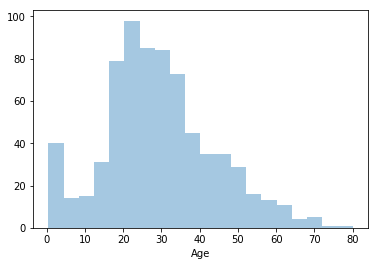

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df['Age'].dropna(), kde=False)
plt.show()

You can also create separate plots based on survival status.

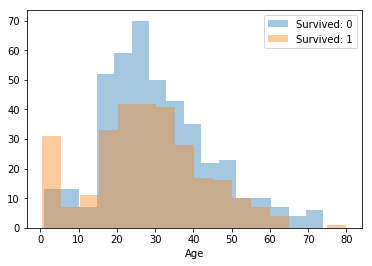

In [0]:
survived_status = []
for survived in df.groupby('Survived'):
    # note try:
    #print(survived[0])
    #print(survived[1])
    sns.distplot(survived[1]['Age'].dropna(), kde=False)
    survived_status.append(survived[0])

plt.legend(['Survived: %d' % (survived_status[0]),\
            'Survived: %d' % (survived_status[1])])
plt.show()

You can also do nested groupby!

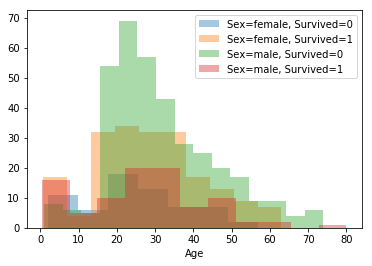

In [0]:
legend_entries = []
for groups in df.groupby(['Sex', 'Survived']):
    sns.distplot(groups[1]['Age'].dropna(), kde=False)
    legend_entries.append('Sex=%s, Survived=%d'% groups[0])
plt.legend(legend_entries)
plt.show()

We can also just look at males if we want to visualize that group by itself.

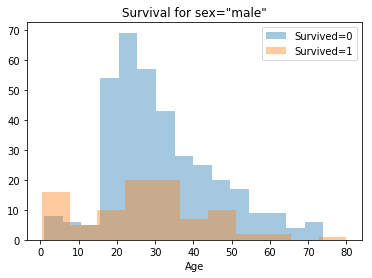

In [0]:
legend_entries = []
for groups in df[df['Sex'] == 'male'].groupby('Survived'):
    sns.distplot(groups[1]['Age'].dropna(), kde=False)
    legend_entries.append('Survived=%d'% groups[0])
plt.legend(legend_entries)
plt.title('Survival for sex="male"')
plt.show()

For variables that only take on a few different values, we have other options to visualize them.  Here are two very similar approaches.  The lines are confidence intervals, which we haven't talked about in this class yet.  A very loose interpretation is that this quantifies the certainty of the estimate of the survival rate.  Small confidence intervals indicate high certainties and low confidence intervals indicate low certainties.  We will be making this more precise later in the class.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


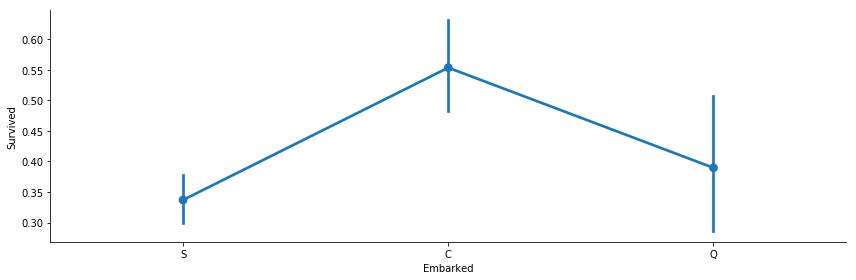

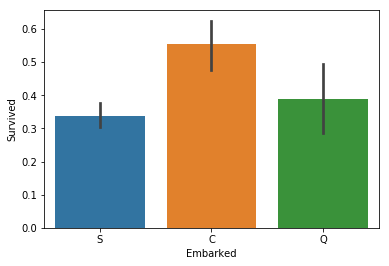

In [0]:
# plot
sns.factorplot('Embarked','Survived', data=df,size=4,aspect=3)

plt.figure()
sns.barplot(x='Embarked', y='Survived', data=df[['Survived', 'Embarked']].dropna(),order=['S','C','Q'])
plt.show()

## Choosing Your Features

Based on the analysis we just did, we can choose an encoding of our features.  For our first model, we'll pick a super simple model where we just use `sex` as our predictor.  One challenge we'll face is how to encode the `sex` variable into the model (since it will have to be a number in order for logistic regression to utilize it).

In [0]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


This is a very common way to encode categorical variables.  It is typically called [one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).  As quick detour, one thing that can be quite useful is to drop the first of your dummy variables.  This can help with the issue where there are multiple models that fit the data equally well.  We'll do a quick discussion of this. 

In [0]:
experiment_1_features = pd.get_dummies(df['Sex'], drop_first=True)
y = df['Survived']

## Training and Evaluating a Model


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
print(model)                   # Note: C=1.0!  C in this case is a penalty on the square of the weights.
model.fit(experiment_1_features, y)
accuracy_score(model.predict(experiment_1_features), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


0.7867564534231201

We can also do a train_test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(experiment_1_features, y)
model = LogisticRegression()
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test), y_test))

0.7937219730941704


We can also do [k-fold cross validation](https://machinelearningmastery.com/k-fold-cross-validation/).

In [0]:
folds = cross_val_score(LogisticRegression(), experiment_1_features, y, cv=5)
print(folds, "mean =",folds.mean())

[0.80446927 0.80446927 0.78651685 0.75280899 0.78531073] mean = 0.7867150249291879


## Interpreting the Model Weights

In [0]:
model = LogisticRegression()
model.fit(experiment_1_features, y)
print("model coefficients (this coefficient is for the 'is Male' feature')", model.coef_[0])
print("bias term (how do we interpret this?')", model.intercept_[0])

model coefficients (this coefficient is for the 'is Male' feature') [-2.43010712]
bias term (how do we interpret this?') 1.0002787584195976


## Tweaking the Model

Here are some suggestions for how to proceed in tweaking the model.

### Just Use Fare

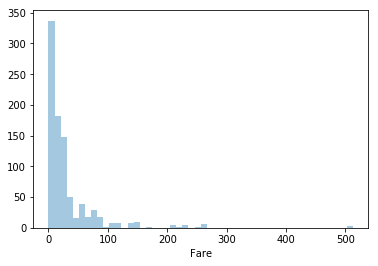

In [0]:
sns.distplot(df['Fare'],kde=False)

In [0]:
experiment_2_b_features = df[['Fare']]
model = LogisticRegression()
model.fit(experiment_2_b_features, y)
print(model.coef_[0])

folds = cross_val_score(LogisticRegression(), experiment_2_b_features, y, cv=5)
print(folds, "mean =",folds.mean())
print('Note that the baseline accuracy of always saying Survived=0 is', 1 - df['Survived'].mean())

[0.01506685]
[0.59217877 0.70391061 0.6741573  0.67977528 0.67231638] mean = 0.6644676707850629
Note that the baseline accuracy of always saying Survived=0 is 0.6161616161616161


### Age only

In [0]:
experiment_2_features = df[['Age']].fillna(df['Age'].median())
model = LogisticRegression()
model.fit(experiment_2_features, y)
print("model coefficients (this coefficient is for the 'Age' feature')", model.coef_[0])
print("bias term (how do we interpret this?')", model.intercept_[0])
print(model.coef_)
folds = cross_val_score(LogisticRegression(), experiment_2_features, y, cv=5)
print(folds, "mean =",folds.mean())

model coefficients (this coefficient is for the 'Age' feature') [-0.01053195]
bias term (how do we interpret this?') -0.1655365626456013
[[-0.01053195]]
[0.61452514 0.61452514 0.61797753 0.61797753 0.61581921] mean = 0.6161649089097865


### Age and Sex

In [0]:
experiment_3_features = pd.concat((experiment_1_features, experiment_2_features), axis=1)
model = LogisticRegression()
model.fit(experiment_3_features, y)
print(model.coef_)
folds = cross_val_score(LogisticRegression(), experiment_3_features, y, cv=5)
print(folds, "mean =",folds.mean())

[[-2.4203819  -0.00358896]]
[0.80446927 0.80446927 0.78651685 0.75280899 0.78531073] mean = 0.7867150249291879


### Age, Sex, is_male_child (AKA "boy")

In [0]:
df['is_male_child'] = (df['Age'] < 5) & (df['Sex'] == 'male')
model = LogisticRegression()
experiment_4_features = pd.concat((df[['is_male_child']], experiment_1_features, experiment_2_features), axis=1)
folds = cross_val_score(LogisticRegression(), experiment_4_features, y, cv=5)
print(folds, "mean =",folds.mean())

[0.79888268 0.82122905 0.79213483 0.75280899 0.78531073] mean = 0.7900732573063143


You could add a new feature.  For instance, perhaps a `FamilySize` variable is more important than the original encoding of siblings and parents / children.

sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic

In [0]:
# Create Family feature and drop SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)